<a href="https://colab.research.google.com/github/Shaan2522/NLP-Projects/blob/main/IndianElections_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

---



In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp

In [2]:
modi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian_ElectionsSentiment_dataset/modi_reviews.csv")
rahul = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian_ElectionsSentiment_dataset/rahul_reviews.csv")

In [3]:
modi.head()

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,TheNirbhay1,PM Modi creates a new record of being the only...
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...


In [4]:
rahul.head()

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...


In [5]:
modi.shape

(25688, 3)

In [6]:
rahul.shape

(14261, 3)

In [7]:
modi['Tweet'][0]

'@anjanaomkashyap I am seeing you as future #bjp spokesperson..\nGood luck. Anjana Om Modi oops Kashyap.\nJournalists like you changed the meaning of journalism. Janta maaf nai karege'

In [8]:
rahul['Tweet'][10]

'@IYCTelangana @IncBasavakalyan @narendramodi @IYC @INCIndia @RahulGandhi @priyankagandhi @HardikPatel_ @Allavaru @keshavyadaviyc @srinivasiyc @srivatsayb @RakshaRamaiah @JM_Scindia This is called in #BJP language,\n"A Swatch &amp; Swasth Hindutva" !!! This theory not applicable to any other person, except #BJPians! \nQuestion: Demonic possession of !!!!'

In [9]:
modi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25688 entries, 0 to 25687
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25688 non-null  int64 
 1   User        25683 non-null  object
 2   Tweet       25683 non-null  object
dtypes: int64(1), object(2)
memory usage: 602.2+ KB


**Using TextBlob for finding Polarity of the Tweets**

---



In [10]:
def find_polarity(review):
  return TextBlob(review).sentiment.polarity

In [11]:
find_polarity("I love Modi")

0.5

In [12]:
find_polarity("I like Modi")

0.0

In [13]:
find_polarity("I dont like Modi")

0.0

In [14]:
find_polarity("I hate Modi")

-0.8

In [15]:
# since tweet is an object so we convert it to string in order to put it in the find_polarity function
modi['Tweet'] = modi['Tweet'].astype(str)
rahul['Tweet'] = rahul['Tweet'].astype(str)

In [16]:
# now we put all the modi and rahul tweets in our function
modi['Polarity'] = modi['Tweet'].apply(find_polarity)
rahul['Polarity'] = rahul['Tweet'].apply(find_polarity)

In [17]:
modi

,Unnamed: 0,User,Tweet,Polarity
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788
...,...,...,...,...
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.000000
25684,25684,SONUPINKOO,I am seriously worried about future of Indian ...,0.209524
25685,25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,-0.700000
25686,25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",0.000000


In [18]:
rahul

,Unnamed: 0,User,Tweet,Polarity
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667
...,...,...,...,...
14256,14256,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ...",0.000000
14257,14257,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,-0.500000
14258,14258,RAMANKAIRA,@sherryontopp Early morning #political move af...,0.080000
14259,14259,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0.080000


In [19]:
# so now we make one more column named label which will give positive if the polarity is >0 and negative if <0 and neutral if =0

modi['Label'] = np.where(modi['Polarity']>0, 'Positive', 'Negative')
modi['Label'][modi['Polarity'] == 0] = 'Neutral'

rahul['Label'] = np.where(rahul['Polarity']>0, 'Positive', 'Negative')
rahul['Label'][rahul['Polarity'] == 0] = 'Neutral'

<ipython-input-19-573011e5bbf1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi['Label'][modi['Polarity'] == 0] = 'Neutral'
<ipython-input-19-573011e5bbf1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul['Label'][rahul['Polarity'] == 0] = 'Neutral'


In [20]:
modi.head(10)

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000,Positive
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,Positive
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,Positive
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121,Positive
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788,Positive
5,5,UttarrPradesh,Which of the following should be top priority ...,0.250000,Positive
6,6,Mdsr20351488,After 5yrs of Modi 🙁\n\n-SC vs SC\n-EC vs EC\n...,0.000000,Neutral
7,7,ShaileshWrites,@RenukaJain6\nI still remember your video mass...,-0.500000,Negative
8,8,iamljp,#bjp @BJP4India @INCIndia @INCKarnataka how mu...,-0.342857,Negative
9,9,TheShobhitAzad,#AzadPrediction\n#LokSabhaElections2019 \n\nBJ...,0.000000,Neutral


In [21]:
rahul.head(10)

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750,Positive
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000,Neutral
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000,Neutral
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,Positive
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667,Negative
5,5,RGspeak,@INCIndia should release a video of @RahulGand...,0.400000,Positive
6,6,SandipGhose,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...,0.000000,Neutral
7,7,__Shivampandey,"Rahul Gandhi Spotted in Switzerland, 1 hour ag...",0.350000,Positive
8,8,usman_majid1,BJP will be nowhere in India after May 23. BJP...,0.000000,Neutral
9,9,pintoo2060,#Punjab \nBhatinda- cong- Sad neck to neck \n...,-0.175000,Negative


In [22]:
# now we remove neutral people from the dataset

modi.drop(modi[modi['Polarity'] == 0].index, inplace = True)
rahul.drop(rahul[rahul['Polarity'] == 0].index, inplace = True)

In [23]:
modi.head(10)

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000,Positive
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,Positive
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,Positive
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121,Positive
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788,Positive
5,5,UttarrPradesh,Which of the following should be top priority ...,0.250000,Positive
7,7,ShaileshWrites,@RenukaJain6\nI still remember your video mass...,-0.500000,Negative
8,8,iamljp,#bjp @BJP4India @INCIndia @INCKarnataka how mu...,-0.342857,Negative
11,11,Mdsr20351488,All Pakistanis had serious doubts on concept o...,0.222222,Positive
12,12,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,Positive


In [24]:
rahul.head(10)

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750,Positive
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,Positive
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667,Negative
5,5,RGspeak,@INCIndia should release a video of @RahulGand...,0.400000,Positive
7,7,__Shivampandey,"Rahul Gandhi Spotted in Switzerland, 1 hour ag...",0.350000,Positive
9,9,pintoo2060,#Punjab \nBhatinda- cong- Sad neck to neck \n...,-0.175000,Negative
10,10,BapiM14,@IYCTelangana @IncBasavakalyan @narendramodi @...,-0.381470,Negative
11,11,eccentricraj,@ani_digital @ANI @rssurjewala IF #ECI #SunilA...,0.800000,Positive
15,15,INC_KONARKKD,@RahulGandhi Great One #LokSabhaElections2019,0.800000,Positive
16,16,dipaksamanta,"@RahulGandhi We should not speak about Nehru, ...",0.800000,Positive


In [25]:
modi.shape, rahul.shape

((17481, 5), (9367, 5))

In [26]:
# now to balance both datasets we remove 8481 rows from modi and 367 from rahul randomly

np.random.seed(10)
remove_n1 = 8481
drop_indices1 = np.random.choice(modi.index, remove_n1, replace=False)
df_modi = modi.drop(drop_indices1)

np.random.seed(10)
remove_n2 = 367
drop_indices2 = np.random.choice(rahul.index, remove_n2, replace=False)
df_rahul = rahul.drop(drop_indices2)

In [27]:
df_modi.shape, df_rahul.shape

((9000, 5), (9000, 5))

**Prediction**

---



In [28]:
modi_count = df_modi.groupby('Label').count()
modi_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
Negative,2600,2600,2600,2600
Positive,6400,6400,6400,6400


In [29]:
rahul_count = df_rahul.groupby('Label').count()
rahul_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
Negative,3039,3039,3039,3039
Positive,5961,5961,5961,5961


In [30]:
# ṇow we find out the negative reviews percentage for both

modi_negative_percentage = (modi_count['Polarity'][0] / 9000) * 100
rahul_negative_percentage = (rahul_count['Polarity'][0] / 9000) * 100

modi_negative_percentage, rahul_negative_percentage

(28.888888888888886, 33.766666666666666)

In [31]:
# modi vs rahul bargraph
politicians = ['Modi','Rahul']
neg_list = [modi_negative_percentage, rahul_negative_percentage]
pos_list = [100 - modi_negative_percentage, 100 - rahul_negative_percentage]
fig = go.Figure(
data = [
    go.Bar(name='Negative',x=politicians,y=neg_list),
    go.Bar(name='Positive',x=politicians,y=pos_list)
]
)
fig.update_layout(barmode='group')
fig.show()

BagofWords **BOW**

---



In [32]:
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict

def bag_of_words(sent):
    count_dict = defaultdict(int)
    vec = np.zeros(len_vector)
    for item in sent:
        count_dict[item] += 1
    for key,item in count_dict.items():
        vec[index_word[key]] = item
    return vec

In [33]:
# !pip install nltk
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
# BOW for modi
from nltk.tokenize import word_tokenize

data1 = df_modi['Tweet']

sentences = []
vocab = []
for sent in data1:
    x = word_tokenize(sent)
    sentence = [w.lower() for w in x if w.isalpha() ]
    sentences.append(sentence)
    for word in sentence:
        if word not in vocab:
            vocab.append(word)

len_vector = len(vocab)

index_word = {}
i = 0
for word in vocab:
    index_word[word] = i
    i += 1

vector = bag_of_words(sentences[0])
vector

array([1., 1., 1., ..., 0., 0., 0.])

In [35]:
# BOW for rahul
from nltk.tokenize import word_tokenize

data2 = df_rahul['Tweet']

sentences = []
vocab = []
for sent in data2:
    x = word_tokenize(sent)
    sentence = [w.lower() for w in x if w.isalpha() ]
    sentences.append(sentence)
    for word in sentence:
        if word not in vocab:
            vocab.append(word)

len_vector = len(vocab)

index_word = {}
i = 0
for word in vocab:
    index_word[word] = i
    i += 1

vector = bag_of_words(sentences[0])
vector

array([1., 1., 1., ..., 0., 0., 0.])

**WordCloud**

---



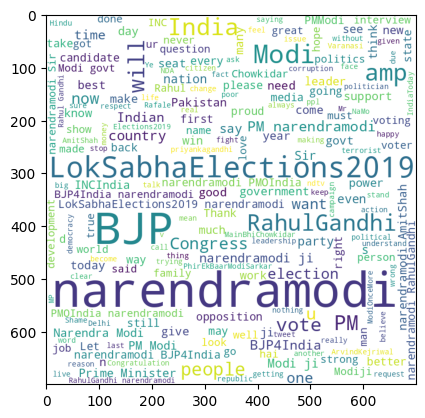

In [36]:
# word cloud for modi
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')
modi_wc = wc.generate(' '.join(df_modi['Tweet']))
plt.imshow(modi_wc)
figsize=(20, 15)

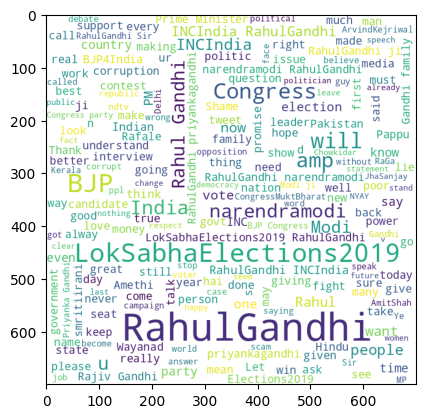

In [37]:
# word cloud for rahul
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')
rahul_wc = wc.generate(' '.join(df_rahul['Tweet']))
plt.imshow(rahul_wc)
figsize=(20, 15)